In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [77]:
df_google = pd.read_csv('/Users/jahansilverman/Documents/CSVs for Data Science Projects/GOOGL_2004-08-01_2024-12-18.csv', 
                        header=0)

In [78]:
df_google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924
1,2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856
2,2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512
3,2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748
4,2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044


In [79]:
df_google.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [80]:
df_google['Date'] = pd.to_datetime(df_google['Date'])

In [81]:
df_google['Year'] = df_google['Date'].dt.year

In [82]:
df_google.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Year                  int64
dtype: object

In [83]:
df_google.set_index('Date', inplace=True)
df_google.head()

,Open,High,Low,Close,Adj Close,Volume,Year
Date,,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.501941,893181924,2004
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.700670,456686856,2004
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.727849,365122512,2004
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.614895,304946748,2004
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.643072,183772044,2004


In [84]:
df_google.drop('Close', axis=1, inplace=True)

df_google['Open'] = df_google['Open'].round(2)
df_google['High'] = df_google['High'].round(2)
df_google['Low'] = df_google['Low'].round(2)
df_google['Adj Close'] = df_google['Adj Close'].round(2)

df_google.head()

,Open,High,Low,Adj Close,Volume,Year
Date,,,,,,
2004-08-19,2.50,2.60,2.40,2.50,893181924,2004
2004-08-20,2.53,2.73,2.52,2.70,456686856,2004
2004-08-23,2.77,2.84,2.73,2.73,365122512,2004
2004-08-24,2.78,2.79,2.59,2.61,304946748,2004
2004-08-25,2.63,2.70,2.60,2.64,183772044,2004


In [85]:
df_google['Price Change'] = df_google['Adj Close'] - df_google['Open']
df_google.head()

,Open,High,Low,Adj Close,Volume,Year,Price Change
Date,,,,,,,
2004-08-19,2.50,2.60,2.40,2.50,893181924,2004,0.00
2004-08-20,2.53,2.73,2.52,2.70,456686856,2004,0.17
2004-08-23,2.77,2.84,2.73,2.73,365122512,2004,-0.04
2004-08-24,2.78,2.79,2.59,2.61,304946748,2004,-0.17
2004-08-25,2.63,2.70,2.60,2.64,183772044,2004,0.01


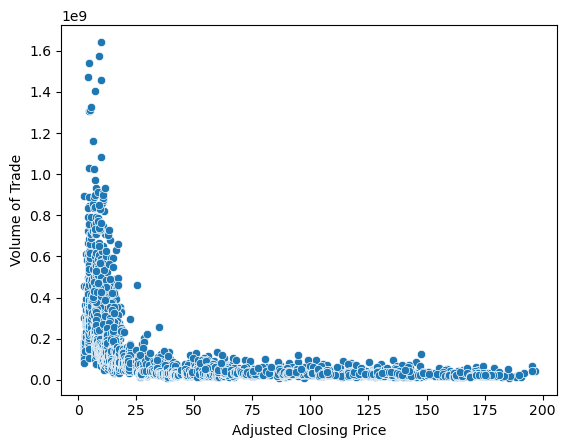

In [86]:
sns.scatterplot(data=df_google, x='Adj Close', y='Volume')
plt.xlabel('Adjusted Closing Price')
plt.ylabel('Volume of Trade')
plt.show()

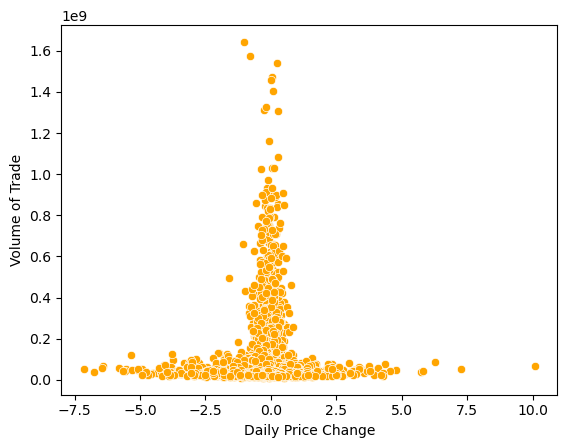

In [87]:
sns.scatterplot(data=df_google, x='Price Change', y='Volume', color='Orange')
plt.xlabel('Daily Price Change')
plt.ylabel('Volume of Trade')
plt.show()

In [88]:
df_google['ln(Volume)'] = np.log(df_google['Volume'])
df_google.drop('Volume', axis=1, inplace=True)
df_google.head()

,Open,High,Low,Adj Close,Year,Price Change,ln(Volume)
Date,,,,,,,
2004-08-19,2.50,2.60,2.40,2.50,2004,0.00,20.610301
2004-08-20,2.53,2.73,2.52,2.70,2004,0.17,19.939508
2004-08-23,2.77,2.84,2.73,2.73,2004,-0.04,19.715744
2004-08-24,2.78,2.79,2.59,2.61,2004,-0.17,19.535648
2004-08-25,2.63,2.70,2.60,2.64,2004,0.01,19.029207


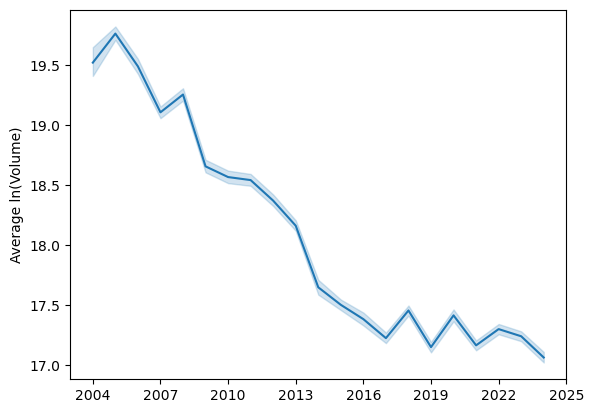

In [89]:
sns.lineplot(x='Year', y='ln(Volume)', data=df_google).set(xlabel=None)
plt.ylabel('Average ln(Volume)')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

In [90]:
df_google['Price Direction'] = np.where(df_google['Price Change'] > 0, 'Price Increase', 
                                      np.where(df_google['Price Change'] < 0, 'Price Decrease', 'No Change'))
df_google.head()

,Open,High,Low,Adj Close,Year,Price Change,ln(Volume),Price Direction
Date,,,,,,,,
2004-08-19,2.50,2.60,2.40,2.50,2004,0.00,20.610301,No Change
2004-08-20,2.53,2.73,2.52,2.70,2004,0.17,19.939508,Price Increase
2004-08-23,2.77,2.84,2.73,2.73,2004,-0.04,19.715744,Price Decrease
2004-08-24,2.78,2.79,2.59,2.61,2004,-0.17,19.535648,Price Decrease
2004-08-25,2.63,2.70,2.60,2.64,2004,0.01,19.029207,Price Increase


In [91]:
counts = df_google['Price Direction'].value_counts()
print(counts)

Price Decrease    3126
Price Increase    1907
No Change           85
Name: Price Direction, dtype: int64


In [92]:
x = df_google[['Open', 'Adj Close', 'High', 'Low']]
y = df_google['ln(Volume)']

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [94]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [95]:
coeff_df_google = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df_google

,Coefficient
Open,0.023259
Adj Close,0.034501
High,0.290739
Low,-0.369264


In [96]:
y_pred = regressor.predict(x_test)

In [97]:
df_actual_vs_predicted_log_volume = pd.DataFrame({'Actual ln(Volume)': y_test, 'Predicted ln(Volume)': y_pred})
df_actual_vs_predicted_log_volume.head(10)

,Actual ln(Volume),Predicted ln(Volume)
Date,,
2004-10-19,19.707700,18.677958
2014-01-14,18.412696,18.318009
2011-12-23,17.877502,18.420510
2015-02-25,17.525075,18.341114
2009-08-24,18.400864,18.521522
2013-11-29,17.679693,18.218209
2022-04-25,17.646931,17.799672
2019-03-06,16.976842,17.688326
2015-11-25,16.977266,18.020418


In [98]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5536761808198194
Mean Squared Error: 0.4657229123254925
Root Mean Squared Error: 0.6824389440275903


In [99]:
r_squared = regressor.score(x_test, y_test)
print('Coefficient of Determination:', r_squared)

Coefficient of Determination: 0.5053609378319392


In [100]:
print('Intercept:', regressor.intercept_)

Intercept: 18.7178313198593
